In [1]:

import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat

    
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

font = {'family' : 'Avenir',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)


In [2]:
CWRU_root=r'C:\Users\luhao\Dropbox\Federated_learning_diagnosis\Check_colab_results\CWRUresults\CWRUresults'
PU_root=r'C:\Users\luhao\Dropbox\Federated_learning_diagnosis\Check_colab_results\PUresults\PUresults'
ISU_root=r'C:\Users\luhao\Dropbox\Federated_learning_diagnosis\Check_colab_results\ISUresults\ISUresults'

PU_sc3=r'C:\Users\luhao\Dropbox\Federated_learning_diagnosis\Check_colab_results\PUresults\PUresults_SC3'
CWRU_sc3=r'C:\Users\luhao\Dropbox\Federated_learning_diagnosis\Check_colab_results\CWRUresults\CWRUresults_SC3'
ISU_sc3=r'C:\Users\luhao\Dropbox\Federated_learning_diagnosis\Check_colab_results\ISUresults\ISUresults_SC3'

# plt.rcParams['font.family'] = 'Avenir'
CWRU_dir=CWRU_root + "/Run"+ str(1)
PU_dir=PU_root + "/Run"+ str(1)
ISU_dir=ISU_root + "/Run"+ str(1)

In [3]:

os.chdir(ISU_dir)
def Load_training_results(given_path):
    os.chdir(given_path)
    Loss_root=loadmat('Model_training.mat')['training_loss']
    Acc_root=loadmat('Model_training.mat')['training_acc']
    loss=np.zeros(len(Loss_root))
    acc=np.zeros(len(Acc_root))
    for i in range(len(Acc_root)):
        loss[i]=np.mean(np.diag(Loss_root[i]))
        acc[i]=np.mean(np.diag(Acc_root[i]))
    return loss[0:50],acc[0:50]
def Load_test_results(given_path):
    os.chdir(given_path)
    Acc_root1=loadmat('Model_test_all.mat')['Test_IID']
    Acc_root2=loadmat('Model_test_all.mat')['Test_NonIID']
    return np.diag(Acc_root1[49]),np.diag(Acc_root2[49])

In [4]:
#Training+test PU
PULC_loss,PULC_acc=Load_training_results(PU_dir+"/LC_all_samples_1")
PUFedcos_loss,PUFedcos_acc=Load_training_results(PU_dir+"/FedCos2_all_samples_1")
PUFedavg_loss,PUFedavg_acc=Load_training_results(PU_dir+"/Fedavg_all_samples_1")
PUFedSNGP_loss,PUFedSNGP_acc=Load_training_results(PU_dir+"/FedSNGP_all_samples_1")

PULC_test_acc1,PULC_test_acc2=Load_test_results(PU_dir+"/LC_all_samples_1")
PUFedcos_tacc1,PUFedcos_tacc2=Load_test_results(PU_dir+"/FedCos2_all_samples_1")
PUFedavg_tacc1,PUFedavg_tacc2=Load_test_results(PU_dir+"/Fedavg_all_samples_1")
PUFedSNGP_tacc1,PUFedSNGP_tacc2=Load_test_results(PU_dir+"/FedSNGP_all_samples_1")


#Training+test CWRU
CWRULC_loss,CWRULC_acc=Load_training_results(CWRU_dir+"/LC_all_samples_1")
CWRUFedcos_loss,CWRUFedcos_acc=Load_training_results(CWRU_dir+"/FedCos2_all_samples_1")
CWRUFedavg_loss,CWRUFedavg_acc=Load_training_results(CWRU_dir+"/Fedavg_all_samples_1")
CWRUFedSNGP_loss,CWRUFedSNGP_acc=Load_training_results(CWRU_dir+"/FedSNGP_all_samples_1")

CWRULC_test_acc1,CWRULC_test_acc2=Load_test_results(CWRU_dir+"/LC_all_samples_1")
CWRUFedcos_tacc1,CWRUFedcos_tacc2=Load_test_results(CWRU_dir+"/FedCos2_all_samples_1")
CWRUFedavg_tacc1,CWRUFedavg_tacc2=Load_test_results(CWRU_dir+"/Fedavg_all_samples_1")
CWRUFedSNGP_tacc1,CWRUFedSNGP_tacc2=Load_test_results(CWRU_dir+"/FedSNGP_all_samples_1")


#Training+test ISU
ISULC_loss,ISULC_acc=Load_training_results(ISU_dir+"/LC_all_samples_1")
ISUFedcos_loss,ISUFedcos_acc=Load_training_results(ISU_dir+"/FedCos2_all_samples_1")
ISUFedavg_loss,ISUFedavg_acc=Load_training_results(ISU_dir+"/Fedavg_all_samples_1")
ISUFedSNGP_loss,ISUFedSNGP_acc=Load_training_results(ISU_dir+"/FedSNGP_all_samples_1")

ISULC_test_acc1,ISULC_test_acc2=Load_test_results(ISU_dir+"/LC_all_samples_1")
ISUFedcos_tacc1,ISUFedcos_tacc2=Load_test_results(ISU_dir+"/FedCos2_all_samples_1")
ISUFedavg_tacc1,ISUFedavg_tacc2=Load_test_results(ISU_dir+"/Fedavg_all_samples_1")
ISUFedSNGP_tacc1,ISUFedSNGP_tacc2=Load_test_results(ISU_dir+"/FedSNGP_all_samples_1")

In [5]:

color =['r','b','g','m']
color =[[222/255,49/255,99/255],[255/255,127/255,80/255],[64/255,224/255,208/255],[100/255,149/255,237/255]]

#Lets assume All the algorithm yields 100% accuracy for Balanced IID setting (Scenario 1)
def addlabels(x,y): #Function that add value labels to the bar plot.
    for i in range(len(x)):
        ax.text(i,y[i],y[i],ha= 'center')

def Sub_plot_bar(ax,x,y,color,title):

    ax.set_title(title)
    ax.set_xticks(x)
    xticks = ['Local','FedAvg','FedCos','FedSNGP']
    ax.set_xticklabels(xticks)
    ax.bar(x, y, color=color)
    
    addlabels(x,np.array(y).round(3))
    # ax.tick_params(axis='x', labelrotation=315)
    plt.setp(ax.get_xticklabels(), rotation=330, ha="left", rotation_mode="anchor")
    # ax.tick_params(axis='x', labelrotation=330)
    ax.set_ylabel('Accuracy')
    ax.set_ylim([0.45,1.05])
    
#Functions related to Radar chart plot:
def Sub_plot_radar(ax,y,color,marker,r_lim):
    labels=['Task 1', 'Task 2', 'Task 3',
     'Task 4', 'Task 5', 'Task 6',
     'Task 7', 'Task 8', 'Task 9',
     'Task 10', 'Task 11', 'Task 12','Task 1'] #The last element is used to connect first and last point
    num_vars=len(y)
    angles = np.linspace(0,2*np.pi,num_vars,endpoint=False).tolist()
    y +=y[:1]
    angles +=angles[:1]
    
    ax.plot(angles,y,color=color,marker=marker,linewidth=1.5,markersize=7.5)
    # ax2.fill(angles,values,color='red',alpha=0.25)
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles),labels)
    
    for label, angle in zip(ax.get_xticklabels(), angles):
      if angle in (0, np.pi):
        label.set_horizontalalignment('center')
      elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
      else:
        label.set_horizontalalignment('right')
        
    ax.set_rlabel_position(180 / num_vars)
    ax.set_rlim(r_lim)


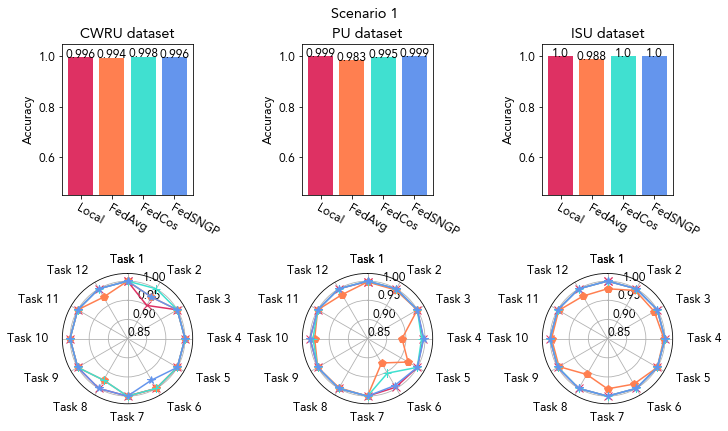

In [6]:

#Scenario 2
r_lim=[0.85,1.02]
fig, axs = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True)

fig.suptitle('Scenario 1') 
ax=axs[0][0]
Sub_plot_bar(ax,range(4),[np.mean(CWRULC_test_acc1),np.mean(CWRUFedavg_tacc1),np.mean(CWRUFedcos_tacc1),np.mean(CWRUFedSNGP_tacc1)],color,'CWRU dataset')

ax=axs[0][1]
Sub_plot_bar(ax,range(4),[np.mean(PULC_test_acc1),np.mean(PUFedavg_tacc1),np.mean(PUFedcos_tacc1),np.mean(PUFedSNGP_tacc1)],color,'PU dataset')

ax=axs[0][2]
Sub_plot_bar(ax,range(4),[np.mean(ISULC_test_acc1),np.mean(ISUFedavg_tacc1),np.mean(ISUFedcos_tacc1),np.mean(ISUFedSNGP_tacc1)],color,'ISU dataset')



values=np.array(np.ones(12))

ax2 = plt.subplot(234, projection='polar')
Sub_plot_radar(ax2,CWRULC_test_acc1.tolist(),color[0],'x',r_lim)
Sub_plot_radar(ax2,CWRUFedavg_tacc1.tolist(),color[1],'p',r_lim)
Sub_plot_radar(ax2,CWRUFedcos_tacc1.tolist(),color[2],'+',r_lim)
Sub_plot_radar(ax2,CWRUFedSNGP_tacc1.tolist(),color[3],'*',r_lim)


ax1 = plt.subplot(235, projection='polar')
Sub_plot_radar(ax1,PULC_test_acc1.tolist(),color[0],'x',r_lim)
Sub_plot_radar(ax1,PUFedavg_tacc1.tolist(),color[1],'p',r_lim)
Sub_plot_radar(ax1,PUFedcos_tacc1.tolist(),color[2],'+',r_lim)
Sub_plot_radar(ax1,PUFedSNGP_tacc1.tolist(),color[3],'*',r_lim)


ax3 = plt.subplot(236, projection='polar')
Sub_plot_radar(ax3,ISULC_test_acc1.tolist(),color[0],'x',r_lim)
Sub_plot_radar(ax3,ISUFedavg_tacc1.tolist(),color[1],'p',r_lim)
Sub_plot_radar(ax3,ISUFedcos_tacc1.tolist(),color[2],'+',r_lim)
Sub_plot_radar(ax3,ISUFedSNGP_tacc1.tolist(),color[3],'*',r_lim)
# ax2.fill(angles,values,color='blue',alpha=0.25)


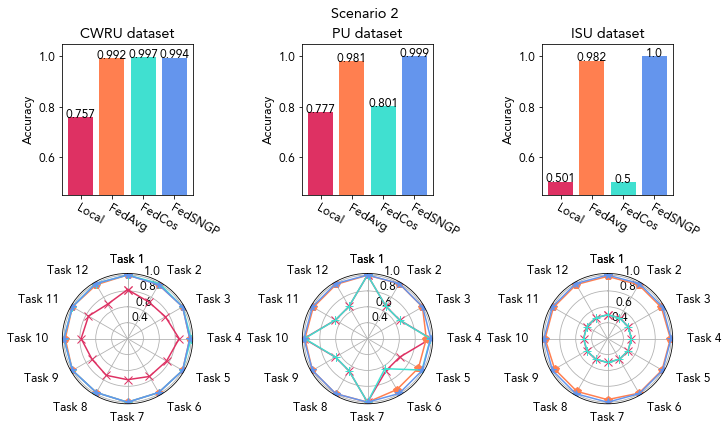

In [7]:
r_lim=[0.20,1.02]
fig, axs = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True)
fig.suptitle('Scenario 2') 
ax=axs[0][0]
Sub_plot_bar(ax,range(4),[np.mean(CWRULC_test_acc2),np.mean(CWRUFedavg_tacc2),np.mean(CWRUFedcos_tacc2),np.mean(CWRUFedSNGP_tacc2)],color,'CWRU dataset')
ax=axs[0][1]
Sub_plot_bar(ax,range(4),[np.mean(PULC_test_acc2),np.mean(PUFedavg_tacc2),np.mean(PUFedcos_tacc2),np.mean(PUFedSNGP_tacc2)],color,'PU dataset')

ax=axs[0][2]
Sub_plot_bar(ax,range(4),[np.mean(ISULC_test_acc2),np.mean(ISUFedavg_tacc2),np.mean(ISUFedcos_tacc2),np.mean(ISUFedSNGP_tacc2)],color,'ISU dataset')



values=np.array(np.ones(12))

ax2 = plt.subplot(234, projection='polar')
Sub_plot_radar(ax2,CWRULC_test_acc2.tolist(),color[0],'x',r_lim)
Sub_plot_radar(ax2,CWRUFedavg_tacc2.tolist(),color[1],'p',r_lim)
Sub_plot_radar(ax2,CWRUFedcos_tacc2.tolist(),color[2],'+',r_lim)
Sub_plot_radar(ax2,CWRUFedSNGP_tacc2.tolist(),color[3],'*',r_lim)


ax1 = plt.subplot(235, projection='polar')
Sub_plot_radar(ax1,PULC_test_acc2.tolist(),color[0],'x',r_lim)
Sub_plot_radar(ax1,PUFedavg_tacc2.tolist(),color[1],'p',r_lim)
Sub_plot_radar(ax1,PUFedcos_tacc2.tolist(),color[2],'+',r_lim)
Sub_plot_radar(ax1,PUFedSNGP_tacc2.tolist(),color[3],'*',r_lim)



ax3 = plt.subplot(236, projection='polar')
Sub_plot_radar(ax3,ISULC_test_acc2.tolist(),color[0],'x',r_lim)
Sub_plot_radar(ax3,ISUFedavg_tacc2.tolist(),color[1],'p',r_lim)
Sub_plot_radar(ax3,ISUFedcos_tacc2.tolist(),color[2],'+',r_lim)
Sub_plot_radar(ax3,ISUFedSNGP_tacc2.tolist(),color[3],'*',r_lim)

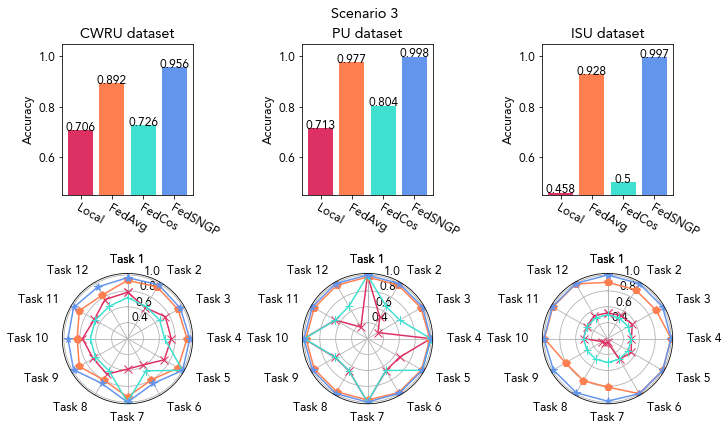

In [8]:

Result_CWRUSC1=np.zeros([4,12])

Result_CWRUSC1[0,:]=CWRULC_test_acc1
Result_CWRUSC1[1,:]=CWRUFedavg_tacc1
Result_CWRUSC1[2,:]=CWRUFedcos_tacc1
Result_CWRUSC1[3,:]=CWRUFedSNGP_tacc1

Result_CWRUSC2=np.zeros([4,12])

Result_CWRUSC2[0,:]=CWRULC_test_acc2
Result_CWRUSC2[1,:]=CWRUFedavg_tacc2
Result_CWRUSC2[2,:]=CWRUFedcos_tacc2
Result_CWRUSC2[3,:]=CWRUFedSNGP_tacc2


Result_PUSC1=np.zeros([4,12])

Result_PUSC1[0,:]=PULC_test_acc1
Result_PUSC1[1,:]=PUFedavg_tacc1
Result_PUSC1[2,:]=PUFedcos_tacc1
Result_PUSC1[3,:]=PUFedSNGP_tacc1

Result_PUSC2=np.zeros([4,12])

Result_PUSC2[0,:]=PULC_test_acc2
Result_PUSC2[1,:]=PUFedavg_tacc2
Result_PUSC2[2,:]=PUFedcos_tacc2
Result_PUSC2[3,:]=PUFedSNGP_tacc2

Result_ISUSC1=np.zeros([4,12])

Result_ISUSC1[0,:]=ISULC_test_acc1
Result_ISUSC1[1,:]=ISUFedavg_tacc1
Result_ISUSC1[2,:]=ISUFedcos_tacc1
Result_ISUSC1[3,:]=ISUFedSNGP_tacc1

Result_ISUSC2=np.zeros([4,12])

Result_ISUSC2[0,:]=ISULC_test_acc2
Result_ISUSC2[1,:]=ISUFedavg_tacc2
Result_ISUSC2[2,:]=ISUFedcos_tacc2
Result_ISUSC2[3,:]=ISUFedSNGP_tacc2

#Scenario 3

PU_3dir=PU_sc3 + "/Run"+ str(1)
CWRU_3dir=CWRU_sc3 + "/Run"+ str(1)
ISU_3dir=ISU_sc3 + "/Run"+ str(1)

#Training+test PU
PULC_loss,PULC_acc=Load_training_results(PU_3dir+"/LC_all_samples_1")
PUFedcos_loss,PUFedcos_acc=Load_training_results(PU_3dir+"/FedCos2_all_samples_1")
PUFedavg_loss,PUFedavg_acc=Load_training_results(PU_3dir+"/Fedavg_all_samples_1")
PUFedSNGP_loss,PUFedSNGP_acc=Load_training_results(PU_3dir+"/FedSNGP_all_samples_1")

PULC_test_acc1,PULC_test_acc2=Load_test_results(PU_3dir+"/LC_all_samples_1")
PUFedcos_tacc1,PUFedcos_tacc2=Load_test_results(PU_3dir+"/FedCos2_all_samples_1")
PUFedavg_tacc1,PUFedavg_tacc2=Load_test_results(PU_3dir+"/Fedavg_all_samples_1")
PUFedSNGP_tacc1,PUFedSNGP_tacc2=Load_test_results(PU_3dir+"/FedSNGP_all_samples_1")


#Training+test CWRU
CWRULC_loss,CWRULC_acc=Load_training_results(CWRU_3dir+"/LC_all_samples_1")
CWRUFedcos_loss,CWRUFedcos_acc=Load_training_results(CWRU_3dir+"/FedCos2_all_samples_1")
CWRUFedavg_loss,CWRUFedavg_acc=Load_training_results(CWRU_3dir+"/Fedavg_all_samples_1")
CWRUFedSNGP_loss,CWRUFedSNGP_acc=Load_training_results(CWRU_3dir+"/FedSNGP_all_samples_1")

CWRULC_test_acc1,CWRULC_test_acc2=Load_test_results(CWRU_3dir+"/LC_all_samples_1")
CWRUFedcos_tacc1,CWRUFedcos_tacc2=Load_test_results(CWRU_3dir+"/FedCos_all_samples_1")
CWRUFedavg_tacc1,CWRUFedavg_tacc2=Load_test_results(CWRU_3dir+"/Fedavg_all_samples_1")
CWRUFedSNGP_tacc1,CWRUFedSNGP_tacc2=Load_test_results(CWRU_3dir+"/FedSNGP_all_samples_1")


#Training+test ISU
ISULC_loss,ISULC_acc=Load_training_results(ISU_3dir+"/LC_all_samples_1")
ISUFedcos_loss,ISUFedcos_acc=Load_training_results(ISU_3dir+"/FedCos2_all_samples_1")
ISUFedavg_loss,ISUFedavg_acc=Load_training_results(ISU_3dir+"/Fedavg_all_samples_1")
ISUFedSNGP_loss,ISUFedSNGP_acc=Load_training_results(ISU_3dir+"/FedSNGP_all_samples_1")

ISULC_test_acc1,ISULC_test_acc2=Load_test_results(ISU_3dir+"/LC_all_samples_1")
ISUFedcos_tacc1,ISUFedcos_tacc2=Load_test_results(ISU_3dir+"/FedCos2_all_samples_1")
ISUFedavg_tacc1,ISUFedavg_tacc2=Load_test_results(ISU_3dir+"/Fedavg_all_samples_1")
ISUFedSNGP_tacc1,ISUFedSNGP_tacc2=Load_test_results(ISU_3dir+"/FedSNGP_all_samples_1")





r_lim=[0.20,1.02]
fig, axs = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True)
fig.suptitle('Scenario 3') 
ax=axs[0][0]
Sub_plot_bar(ax,range(4),[np.mean(CWRULC_test_acc2),np.mean(CWRUFedavg_tacc2),np.mean(CWRUFedcos_tacc2),np.mean(CWRUFedSNGP_tacc2)],color,'CWRU dataset')

ax=axs[0][1]
Sub_plot_bar(ax,range(4),[np.mean(PULC_test_acc2),np.mean(PUFedavg_tacc2),np.mean(PUFedcos_tacc2),np.mean(PUFedSNGP_tacc2)],color,'PU dataset')
ax=axs[0][2]
Sub_plot_bar(ax,range(4),[np.mean(ISULC_test_acc2),np.mean(ISUFedavg_tacc2),np.mean(ISUFedcos_tacc2),np.mean(ISUFedSNGP_tacc2)],color,'ISU dataset')



values=np.array(np.ones(12))

ax2 = plt.subplot(234, projection='polar')
Sub_plot_radar(ax2,CWRULC_test_acc2.tolist(),color[0],'x',r_lim)
Sub_plot_radar(ax2,CWRUFedavg_tacc2.tolist(),color[1],'p',r_lim)
Sub_plot_radar(ax2,CWRUFedcos_tacc2.tolist(),color[2],'+',r_lim)
Sub_plot_radar(ax2,CWRUFedSNGP_tacc2.tolist(),color[3],'*',r_lim)


ax1 = plt.subplot(235, projection='polar')
Sub_plot_radar(ax1,PULC_test_acc2.tolist(),color[0],'x',r_lim)
Sub_plot_radar(ax1,PUFedavg_tacc2.tolist(),color[1],'p',r_lim)
Sub_plot_radar(ax1,PUFedcos_tacc2.tolist(),color[2],'+',r_lim)
Sub_plot_radar(ax1,PUFedSNGP_tacc2.tolist(),color[3],'*',r_lim)



ax3 = plt.subplot(236, projection='polar')
Sub_plot_radar(ax3,ISULC_test_acc2.tolist(),color[0],'x',r_lim)
Sub_plot_radar(ax3,ISUFedavg_tacc2.tolist(),color[1],'p',r_lim)
Sub_plot_radar(ax3,ISUFedcos_tacc2.tolist(),color[2],'+',r_lim)
Sub_plot_radar(ax3,ISUFedSNGP_tacc2.tolist(),color[3],'*',r_lim)
# ax2.fill(angles,values,color='blue',alpha=0.25)
